# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the clean dataset through univariate & multivariate analysis 
- Investigate correlations between features
- Extract relevant insights to determine steps for feature engineering

In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
event_df = pl.read_csv("../data/events.csv")
category_tree_df = pl.read_csv("../data/category_tree.csv")
items_df = pl.read_csv("../data/item_properties.csv")

In [4]:
event_df.head()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null


In [5]:
# Unique visitors 
print("Unique visitors:")
print(event_df.select(pl.col('visitorid').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 1407580   │
└───────────┘


In [6]:
# Total visitors 
print("Total visitors:")
print(event_df.select(pl.col('visitorid').len()))

Total visitors:
shape: (1, 1)
┌───────────┐
│ visitorid │
│ ---       │
│ u32       │
╞═══════════╡
│ 2756101   │
└───────────┘


In [7]:
df_count = event_df["event"].value_counts(sort=True)
df_count

event,count
str,u32
"""view""",2664312
"""addtocart""",69332
"""transaction""",22457


In [8]:
# Total transactions 
print("Number of transactions: ",df_count['count'][-1])

# Percent of transactions vs all other events 
print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

Number of transactions:  22457
Percent of transactions: 0.815


In [9]:
category_tree_df

categoryid,parentid
i64,i64
1016,213
809,169
570,9
1691,885
536,1691
…,…
49,1125
1112,630
1336,745


### Univariate Analysis 

In [10]:
event_df

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1433221332117,257597,"""view""",355908,null
1433224214164,992329,"""view""",248676,null
1433221999827,111016,"""view""",318965,null
1433221955914,483717,"""view""",253185,null
1433221337106,951259,"""view""",367447,null
…,…,…,…,…
1438398785939,591435,"""view""",261427,null
1438399813142,762376,"""view""",115946,null
1438397820527,1251746,"""view""",78144,null


### Multivariate Analysis 

In [11]:
grouped_df = event_df.group_by(pl.col('event')).agg(pl.col('itemid'))
grouped_df

event,itemid
str,list[i64]
"""transaction""","[356475, 15335, … 312728]"
"""view""","[355908, 248676, … 152913]"
"""addtocart""","[5206, 10572, … 346534]"


### Work to do

- Turn the following functionality into utility functions 
    - List comprehension for key, values 
    - Plotting graphs 
    - 

In [148]:
# Counting the most bought items 
most_bought_items = Counter(grouped_df.row(0)[1]).most_common()
most_bought_items=most_bought_items[:10]
most_bought_items

[(461686, 133),
 (119736, 97),
 (213834, 92),
 (7943, 46),
 (312728, 46),
 (445351, 45),
 (48030, 41),
 (420960, 38),
 (248455, 38),
 (17478, 37)]

In [135]:
# Adding id's of 10 most bought item to list for plotting 
bought_items_list = [x for x,i in most_bought_items]
bought_items_list=bought_items_list[:10]
bought_items_list

[461686, 119736, 213834, 7943, 312728, 445351, 48030, 420960, 248455, 17478]

In [137]:
# Adding frequency of 10 most bought items to list for plotting 
bought_frequency_list = [i for x,i in most_bought_items]
bought_frequency_list =bought_frequency_list[:10]
bought_frequency_list

[133, 97, 92, 46, 46, 45, 41, 38, 38, 37]

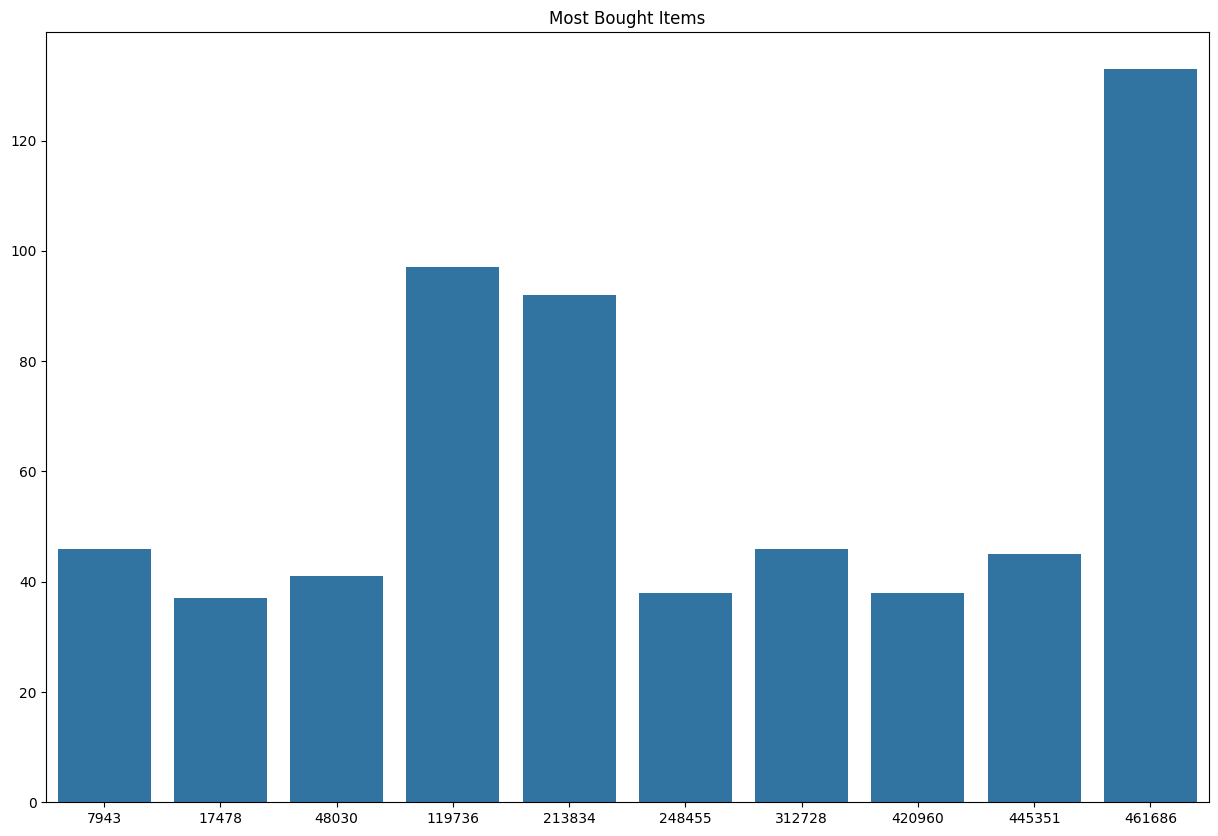

In [190]:
# Dimensions of figure
fig,ax = plt.subplots(figsize=(15, 10))

plt.title("Most Bought Items")
sns.barplot(x=bought_items_list,y=bought_frequency_list,ax=ax)
plt.show()

In [149]:
# Counting the most added to cart items 
most_popular_cart_items = Counter(grouped_df.row(2)[1]).most_common()
most_popular_cart_items=most_popular_cart_items[:10]
most_popular_cart_items

[(461686, 306),
 (312728, 162),
 (409804, 156),
 (320130, 141),
 (29196, 136),
 (7943, 97),
 (48030, 95),
 (441852, 90),
 (445351, 89),
 (257040, 89)]

In [150]:
# Adding id's of 10 most add to cart item to list for plotting 
cart_items_list = [x for x,i in most_popular_cart_items]
cart_items_list = cart_items_list[:10]
cart_items_list

[461686, 312728, 409804, 320130, 29196, 7943, 48030, 441852, 445351, 257040]

In [152]:
# Adding frequency of 10 most add to cart items to list for plotting 
cart_frequency_list = [i for x,i in most_popular_cart_items]
cart_frequency_list = cart_frequency_list[:10]
cart_frequency_list

[306, 162, 156, 141, 136, 97, 95, 90, 89, 89]

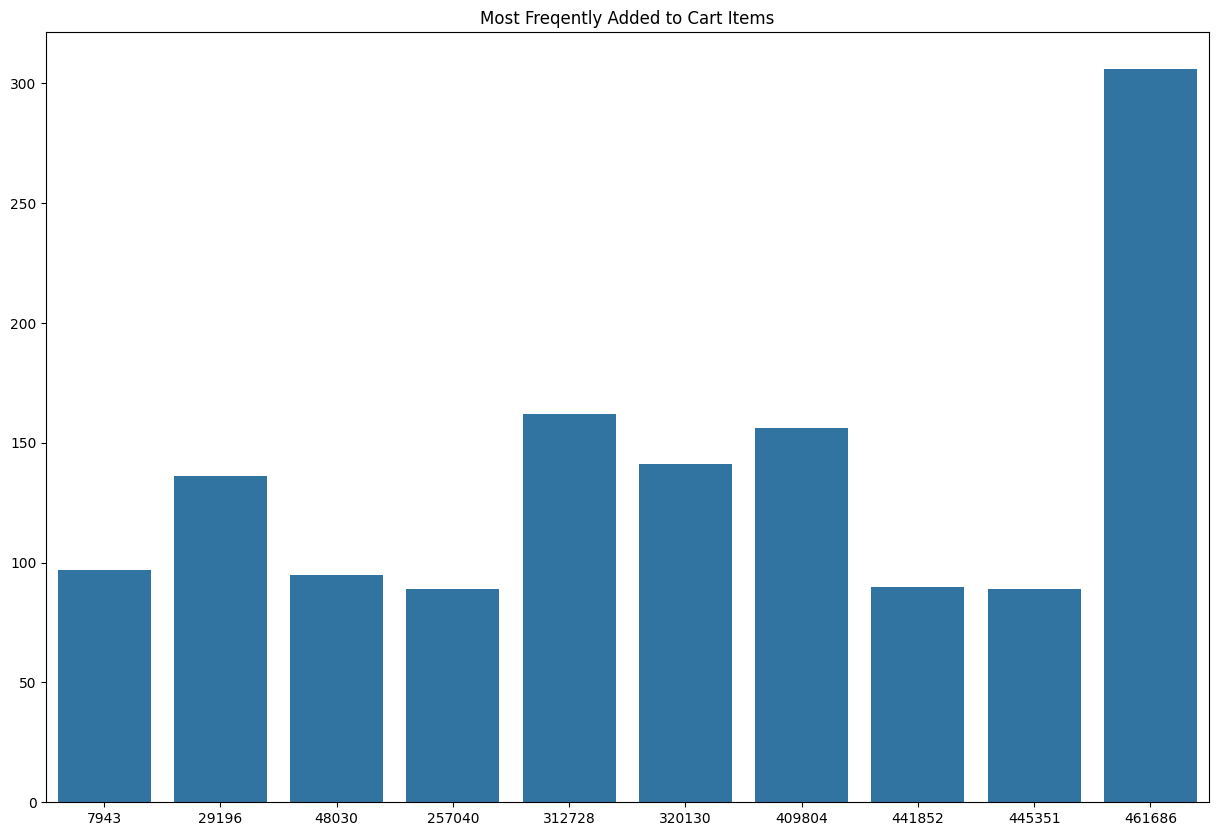

In [189]:
# Dimensions of figure
fig,ax = plt.subplots(figsize=(15, 10))

plt.title("Most Freqently Added to Cart Items")
sns.barplot(x=cart_items_list,y=cart_frequency_list,ax=ax)
plt.show()

In [192]:
most_viewed_items = Counter(grouped_df.row(1)[1]).most_common()
most_viewed_items = most_viewed_items[:10]
most_viewed_items

[(187946, 3410),
 (461686, 2539),
 (5411, 2325),
 (370653, 1854),
 (219512, 1740),
 (298009, 1642),
 (96924, 1633),
 (309778, 1565),
 (257040, 1531),
 (384302, 1528)]

In [193]:
# Adding id's of 10 most viewed items to list for plotting 
viewed_items_list = [x for x,i in most_viewed_items]
viewed_items_list = viewed_items_list[:10]
viewed_items_list

[187946, 461686, 5411, 370653, 219512, 298009, 96924, 309778, 257040, 384302]

In [194]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_frequency_list = [i for x,i in most_viewed_items]
viewed_frequency_list = viewed_frequency_list[:10]
viewed_frequency_list

[3410, 2539, 2325, 1854, 1740, 1642, 1633, 1565, 1531, 1528]

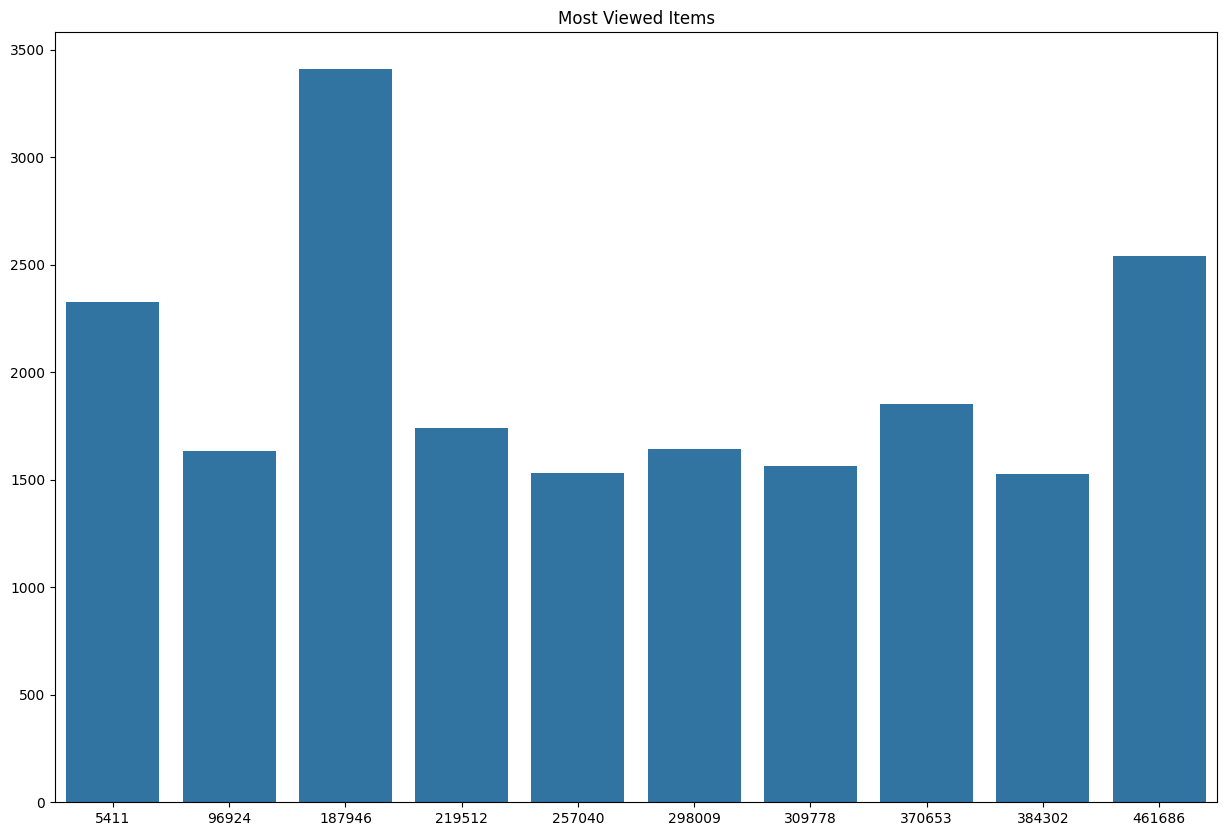

In [196]:
# Dimensions of figure
fig,ax = plt.subplots(figsize=(15, 10))

plt.title("Most Viewed Items")
sns.barplot(x=viewed_items_list,y=viewed_frequency_list,ax=ax)
plt.show()

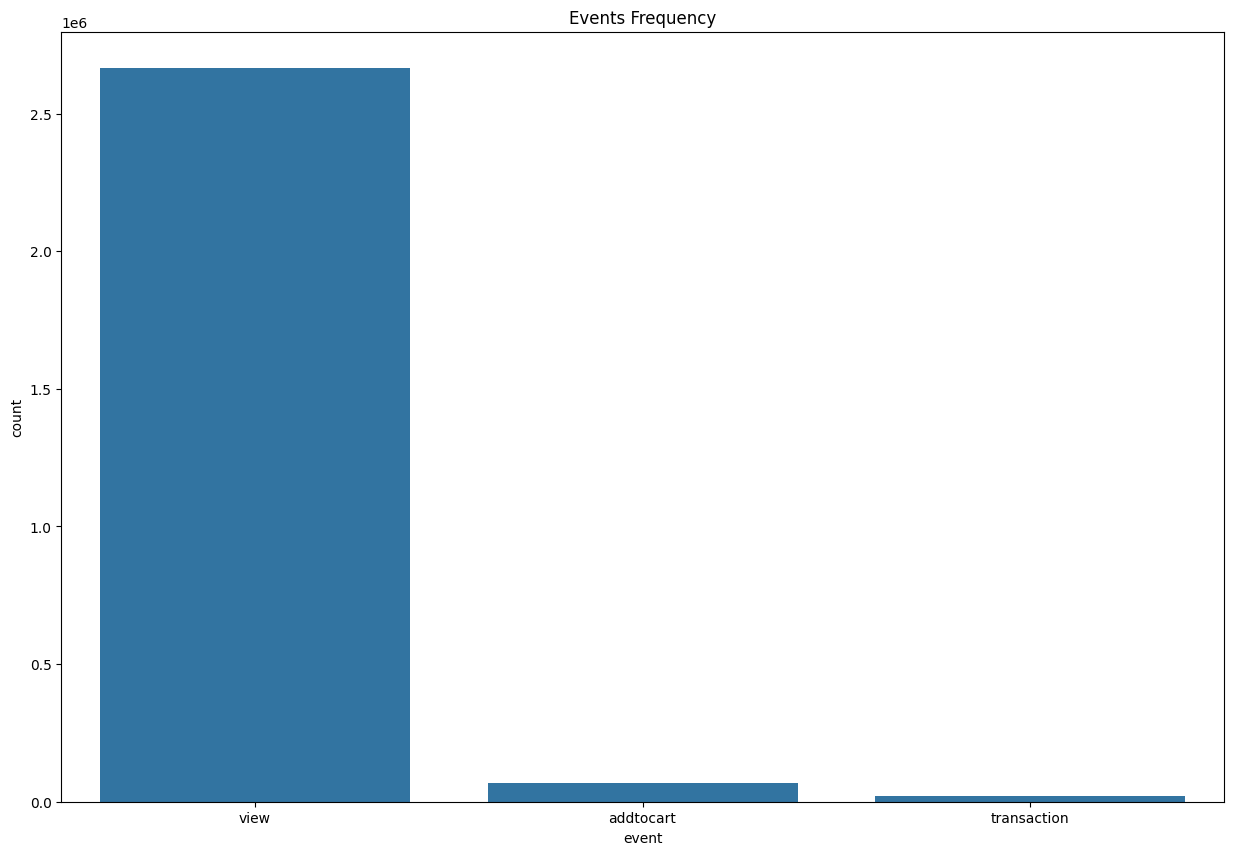

In [197]:
# Dimensions of figure
fig,ax = plt.subplots(figsize=(15, 10))

plt.title("Events Frequency")
sns.barplot(x=df_count['event'],y=df_count['count'],ax=ax)
plt.show()

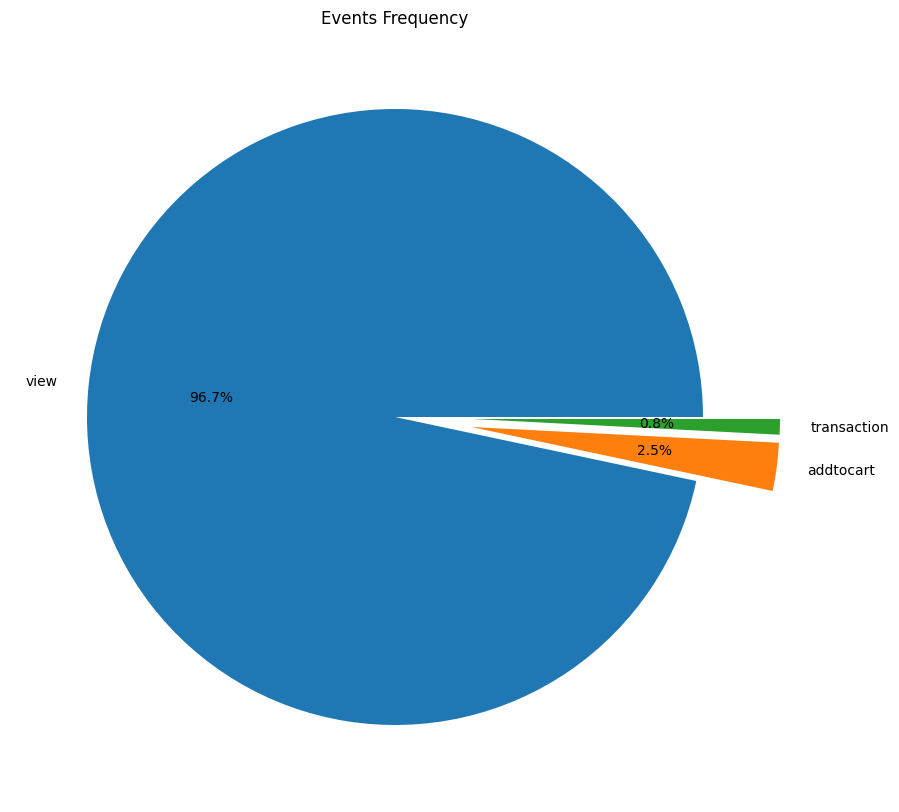

In [201]:
data = df_count['count']
labels = df_count.select(pl.col('event')).to_series().to_list()

plt.subplots(figsize=(15, 10))
plt.pie(df_count['count'], explode=(0, 0.25, 0.25),labels=labels,autopct='%1.1f%%')
plt.title("Events Frequency")
plt.show()

In [16]:
purchase_df = event_df.filter(pl.col('event') == 'transaction')
purchase_df.tail()

timestamp,visitorid,event,itemid,transactionid
i64,i64,str,i64,str
1438377176570,1050575,"""transaction""",31640,"""8354"""
1438379878779,861299,"""transaction""",456602,"""3643"""
1438357730123,855941,"""transaction""",235771,"""4385"""
1438355560300,548772,"""transaction""",29167,"""13872"""
1438358989163,1051054,"""transaction""",312728,"""17579"""
